In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal, binom
import bplot as bp
from scipy.optimize import minimize
from scipy.special import loggamma

In [2]:
N = 4000
x = np.random.choice([i+1 for i in range(6)], N)

In [3]:
c = np.cumsum(x)

In [4]:
x[:6]

array([2, 6, 2, 6, 4, 4])

In [5]:
c[len(c)-1]

14041

In [6]:
np.arange(10) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
p = c / (np.arange(N) + 1)

In [8]:
p[:6]

array([2.        , 4.        , 3.33333333, 4.        , 4.        ,
       4.        ])

In [9]:
p[:6:-1]

array([3.51025   , 3.51062766, 3.5110055 , ..., 3.8       , 3.77777778,
       3.75      ])

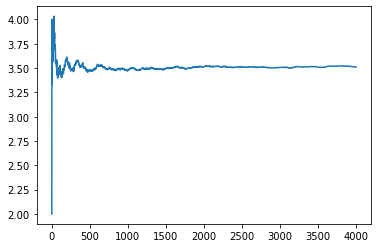

In [10]:
bp.line(np.arange(N), p)

In [11]:
r = 6
sum([i+1 for i in range(r)])/r

3.5

**Sample** - Verb -- Take observation  
**Sample** - Noun -- The finite mean of samples  
**Pouplation** - Group of things you're interested in learning about  
**Parameters** - Characteristics of the population  
**Statistics** - Calculating the Parameters of the population, Any function of the sample
  * Median
  * Mode
  * Standard Deviation

## 04 Sept, 2019
Finite vs Infinite  
Finite sample where you can calculate statistics  
Infiinite Population where you can caluclate parameters  
$$x\in \{0,1\}$$
represents a coin flip
$$x\in\{1,2,3,4,5,6\}$$
Represents a dice

The thing that connects infinite and finite worlds are called **random variables**  
**Random Variable** -- A numerical variable, such that until it is observed we don't know its value. This can show up in the infinite world as an **abstraction**, but once we determine (flip the coin) we create an **instance** or **observation**  
We can reference a true flip observations as $\{1,0\}$ but abstract in the infinite world as $x_1, x_2$

### There are 3 important characteristics of Random Variables
  1. Discrete or Continuous -- A random variable that can take on any value in a countably infinite set (continuous meaning uncountably infinite) The natural numbers are a countably finite infinite set
  2. The values the random variable can take on (The support of the random variable)
  3. A function that describes the probabilities on values in the support (Probability density function)
  
### Uniform random variable
A dice is an example of a uniform random variable *Uniform*$(1,6)$  where the probability of all the values in the support is equal  
We can write this as: X ~ Uniform$(1,6)$

A dice is a discrete Uniform(1,6) random variable

### Bernoulli
A coin flip is an example of a Bernoulli random variable, where theres a binary outcome: 0 and 1. It is separated from a uniformed variable, because while a uniform has to have the same probability for both outcomes, a Bernoulli doesn't necessarily. We can call this probability $p$.  
The two probabilities can be called $p$ and $1-p$ where $p$ is the population parameter that can be estimated by taking samples.

# 05 September 2019
We can attempt to generalize the function that defines the Uniform(a, b)
$$f(x)=\frac{1}{b-a+1}$$  
But since we're just counting elements in the support, we can say
$$\sum_{i=1}^{N}p=1$$
or
$$N*p=1 == p=\frac{1}{N}$$
and we can say that $N=b-a+1$

$$P(X=x)=\frac{1}{b-a+1}=f(x)$$
Where $P(X=x)$ "The probability that the discrete random uniform takes on the value which is the formula ..."  
Capital letters are the Random variables that we don't know until we measure. Lowercase are the values that the R.V. can take on

In [12]:
def Uniform(a, b):
    """
    Attempting to describe the Uniform function
    for the population
    """
    if type(a) is not int or type(b) is not int:
        return -1
    return 1/(b-a+1)

In [13]:
N = 1001
x = np.random.choice(np.arange(1,7), N)

In [14]:
np.mean(x == 2)

0.16283716283716285

In [15]:
np.sum(x==1)/N

0.16383616383616384

In [16]:
Uniform(1,6)

0.16666666666666666

# 09 September, 2019
We can identify a certain hand in poker as a bernoulli R.V. by saying 1 is getting that hand and 0 is not getting that hand

In [17]:
#suit = ["Hearts", "Spades", "Clubs", "Diamonds"]
suit = "HSCD"
ranks = "A23456789TJQK"
deck = [s + r for s in suit for r in ranks] # list comprehension

In [18]:
np.random.seed(1234)
x = np.random.choice(deck, size = 5, replace=False)
x = [i[1] for i in x]
np.unique(x, return_counts=True)

(array(['2', '6', '7', 'A'], dtype='<U1'), array([2, 1, 1, 1]))

In [19]:
x == 'D2'

False

In [20]:
N = 10001
np.random.seed(124325)
count = 0
for n in range(N):
    hand = np.random.choice(deck, 1, replace=False)
    count += (hand == "D2").sum() == 1
print(count/N)

0.018998100189981004


# 12 September, 2019

$X\sim\text{Bernoulli}(p)$  
A Bernoulli random variable is of the support $\{0,1\}$ where the probability of $1$ is referenced by $p$, thusly, the probability of $0$ is referenced by $1-p$  
 
The Following can be represented as:
$$f(x) = p^x(1-p)^{1-x} \text{ for } x\in\{0,1\}$$  
  
$$f(0)= p^0(1-p)^{1-0}=1*(1-p)=1-p$$
$$f(1)=p^1(1-p)^{1-1}=p(1)=p$$

**EX:** A fair coin can be represented as a Bernoulli R.V. where $p=0.5$  
**EX:** A server that has some probability of failure $p$ (0 is not fail, 1 is fail)

## Serial
Let us focus on the server example:
$$X_1\sim\text{Bernoulli}(p_1)$$
$$X_2\sim\text{Bernoulli}(p_2)$$
$$\text{Serial: in}\rightarrow x_1\rightarrow x_2\rightarrow \text{out}$$
And by using this serial, we can find the overal probability of success for the whole system. $P(\text{succeed})$ determines the probability of success.

P(succeed)$=(1-p_1)*(1-p_2)$  
In the world of probabilities, the english word *and* is associated with multiplication.

P(failure)$=p_1*(1-p_2)+p_1*p_2+(1-p_1)*p_2$  
In the world of probabilities, the english word *or* is associated with addition.

The probability of the system succeeding and failing is *mutually exclusive* meaning they have no overlap.  
This means that we can essentially just take $1=\text{P(fail)}+\text{P(succeed)}$ or $ \text{P(fail)}=1-\text{P(succeed)}$

If $A$ and $B$ (0 or 1) and exhaustive(fills the whole support), then $P(A)=1-P(B)$

## Parallel

P(failure) = $p_1*p_2$  
P(succeed) = $1-\text{P(failure)}$

# 13 September, 2019

## Conditional Probability
Let $A$ and $B$ be __events__.  
**Events** - Are the random outcomes of some process as a set of words. Similar to a Random Variable, but with words. Events *can* be mutually exclusive, but do not have to be.

**EX**  
$A=\text{Failure of some system}$  
$B=\text{Success of some system}$

**Defn**  
$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$
The probability of $A$ conditioned on $B$

**EX**  
$B$ = an ace is drawn first from a fair deck of cards without replacement.  
$A$ = an ace was drawn second

$P(A|B)=\frac{3}{51}$ Because if $B$ succeeds, there would be 3 aces and 51 cards, in a fair deck, we already know this probability

We can utilize the formula to actually show this
$$P(A|B)=\frac{P(A\cap B)}{P(B)}=\frac{P(A)*P(B)}{P(B)}=P(A)=\frac{3}{51}$$

## Independent (Events/Random Variables)
The events $A$ and $B$ are independent if and only if:
$$P(A\cap B) = P(A)*P(B)$$
If (and only if) the two sides of the equation are equal, then $A$ and $B$ are independent. If they are inequal, then they are dependent  
If two events are mutually exclusive, they are dependent. To be independent, they must have some overlap

**EX**  
What is the changes of the first card you drew to be a king if the first card you drew was a king? -- A mutually exclusive option, therefore dependent.

**EX**  
If a coin flip lands on head first, what are the chances of a second flip landing on heads? Because the first coin flip has no bearing on the second coin flip

# 16 September, 2019

### Example of Independence  
Flip over two cards from a well shuffled fair deck without replacement  
$B$ = First card is an Ace  
$A$ = Second card is an Ace  
$P(A)$? $P(B)$?

$P(B)=\frac{4}{52}*\frac{3}{51}+\frac{4}{52}*\frac{48}{51}$  
$P(A)=\frac{4}{52}*\frac{3}{51}+\frac{48}{52}*\frac{4}{51}$

In [21]:
pb=((4/52)*(3/51))+((4/52)*(48/51)) # Probability of B P(B)

pa=((4/52)*(3/51))+((48/52)*(4/51)) # Probability of A P(A)

$P(A\cap B)=P(A)*P(B)$  
$\frac{4}{52}*\frac{3}{51}=\frac{4}{52}*\frac{4}{52}$  
Since the two sides of the equation are not equal, they are **dependant**

## Binomial
A **binomial** RV is the sum of $K$ Bernoulli(p)s. Where $K$ is the word **trials**.

**EX**  
Binomial(K=4,p)  
$X_1, X_2, X_3, X_4$  
$0, 1, 1, 0$ respectively so $0 + 1 + 1 + 0 = 2$
$$Y=\sum^{K}_{k=1}x_k$$

**EX**  
$K=5$  
$1, 2, 4, 5, 3$ Where we're interested in $3$  
*Bernoulli* $0,0,0,0,1$  
*Binomial* $1$

3 main components of RVs as it corresponds to Binomials  
  1. Discrete
  2. The support $x\in \{0,...,k\}$
  3. Probability Density Function that calculates probability for each value in the support $f(x)$
  
**EX**  
$\text{Binomial}(k=4, p)$  
$1, 1, 1, 0$  
where the probability would be $p*p*p*(1-p)=p^3(1-p)$  
And since there is 4 possible options of having 3 1's and 1 0,  
$f(3)=4p^3(1-p)$  
We can extrapolate $f(2)=3p^2(1-p)^2$  

Probability density function for **binomial(k,p)**
$$f(x)=\big(^k_x\big)p^x(1-p)^{k-x}$$
$$\big(^k_x\big)=\frac{k!}{x!(k-x)!}$$

# 18 September 2019

## Expected Value
Let $X\sim F$ with pdf(probability density function) $f$ and support $S$  
Let $g$ be a function of $X$  
The expected value of $g(X)$:
$$\textbf{E}(g(X))=\sum_{S}g(x)f(x)$$

**EX**  
x   |   1   2   3   4  
f(x)| 0.2 0.1 0.4 0.3


| x | 1 | 2 | 3 | 4   |
|------|------| ----- | ---- | ----- | 
|   f(x)  | 0.2 | 0.1 | 0.4 | 0.3 |
let g(x)=x
$$\textbf{E}(g(X))=\sum_{S}g(x)f(x)$$
$$=1*0.2+2*0.1+3*0.4+4*0.3$$

In [22]:
x = np.arange(4)+1
fx = np.asarray([.2, .1, .4, .3])
np.sum(x*fx)

2.8

2.8 is the *population analog* to the sample mean -- it's what you would get if, in the limit, if you rolled the die an infinite number of times and divided by the rolls

In [23]:
np.random.choice(x, p=fx, size=10000).mean()

2.8093

Find $\textbf{E}(X)$ of $X~\text{Uniform}(1,6)$

In [24]:
#Find the expected value of a fair dice
x = np.arange(6)+1
#fx = np.repeat(1/6, 6)
#fx = np.asarray([0.4, 0.05, 0.05, 0.05, 0.05, 0.4])
fx = np.asarray([0.05, 0.15, 0.3, 0.3, 0.15,  0.05])
EX = np.sum(fx * x)
EX

3.5

## Population Variance
$$\textbf{V}(X)=\textbf{E}((X-\textbf{E}(X))^2)$$
"On average, how far away is the random value from the expected value in squared distance"
$$g(x)=(x-\textbf{E}(X))^2)$$
$$\textbf{V}(X)=\sum_{S}(x-\textbf{E}(X))^2*f(x)$$

In [25]:
VX = np.sum((x-EX)**2 * fx)
VX

1.4499999999999997

# 20 September, 2019

In [26]:
binom(12,0.65).pmf(5)

0.059124608122658136

In [27]:
np.mean(np.random.binomial(12,0.65,size=1001)==5)

0.04995004995004995

## Standard Deviation 
$$\sqrt{\textbf{V}(X)}$$

# 23 September, 2019

## Population Mean
$$\textbf{E}(X)=\sum_Sx*f(x)$$

So, if we had $X\sim\text{Binomial}(k,p)$, We can state $\textbf{E}(X)=k*p$

In [28]:
k = 11
p = 0.5
round(np.sum([x * binom.pmf(x, k, p) for x in range(k+1)]), 12)

5.5

If we had $X\sim\text{Uniform}(a,b)$ we can state $\textbf{E}(X)=\frac{b+a}{2}$

In [29]:
round(np.sum([(x+1)*(1/6) for x in range(6)]), 12)

3.5

## Likelihood Method
$$L(\theta|\underline{x})=\prod_{n=1}^{N}f(x_n|\theta)$$
Where $f$ is the probability density function  
$L$ is the likelihood function  
$\Pi$ is the products of (similar to $\sum$)  
$\theta$ is population parameter(s)  
$x_n$ is an observed RV, in the array $\underline{x}$  
$\underline{x}$ is the array of observed data

__Goal__  
What is the most likely value of $\theta$, given the observed data $\underline{x}$ 

$\hat{\theta}=\text{argmax}_{\theta}L(\theta|\underline{x})$ Where $\hat{\theta}$ is the maximum likelihood estimator

**EX**  
$f(x)=-x^2$, $0=\text{argmax}f(x)$

**EX**  
$X_1,...,X_N\sim\text{Binomial}(k,p)$  
$L(p|\underline{x},k)=\prod_{n=1}^{N}\big(^k_{x_n}\big)p^{x_n}(1-p)^{k-x_n}$

To find the maximum, we:  
  0. Take natural log
  1. Take the derivative with respect to $p$ (simplify)
  2. Set derivative equal to 0
  3. Solve for $p$
  
  
  0. $\sum_{n=1}^{N} log(\big(^k_{x_n}\big)p^{x_n}(1-p)^{k-x_n}$  
   $\sum\{log\big(^k_{x_n}\big)+x_nlog(p)+(k-x_n)log(1-p)\}$
  1. $\sum\{0+\frac{x_n}{p}-\frac{k-x_n}{1-p} = 0$ (And step 2)
  
  
  3. $\frac{\sum x_n}{p}=\frac{\sum(k-x_n)}{1-p}$
  4. $\hat{p}=\frac{\sum x_n}{k*N}$

# 25 September, 2019

## Likelihood continued
$X_1,\dots,X_N\sim\text{Binomial}(k,p)$  
Our goal is to esimate:  
$$L(p|\underline{x},k)=\prod^{N}_{n=1}f(x_n|p)$$
We need to put on our guessing hat for $\hat{p}=\text{argmax}_pL(p|\underline{x},k)$ where we can call $\hat{p}$ the maximum likelihood estimator

*Why Product?*  
**EX** Bernoulli  
What's the probability of getting Heads, Tails, and Heads in flipping a fair coin?  
$HTH$ we can rewrite as  
$p*(1-p)*p$

Since the Bernoulli function is $f(x)=p^x(1-p)^{1-x}$,  
Our function maps to $p*(1-p)*p\rightarrow f(1)*f(0)*f(1)$

We can rewrite this as $\prod_{n=1}^Nf(x_n)$



Back to the main topic:

Take the natural log(and simplify):
$$log(L(p|\underline{x},k))=\sum_{n=1}^{N}log(f(x_n|p))$$
$$=\sum_{n-1}^{N}log(\big(^k_{x_n}\big)*p^{x_n}*(1-p)^{k-x_n}$$
$$=\sum\{log\big(^k_{x_n}\big)+log(p^{x_n})+log((1-p)^{k-x_n})\}$$
$$=\sum\{log\big(^k_{x_n}\big)+x_nlog(p)+(k-x_n)*log(1-p)\}$$
We now want to take the derivative with respect to $p$, but we can remove all terms that do not have $p$ in them (because they are constant)
$$\propto\sum_{n=1}^{N}\{x_nlog(p)+(k-x_n)log(1-p)\}$$
This is called the **Simplified Log-Likelihood**

In [30]:
# Standardized method of defining the function
def ll_rv_name(p, x, k):
    """
    ll - Log Likelihood
    binomial - the RV we're working with
    p - the probability to maximize
    x - the array to the data
    k - claimed known number of trials
    """
    pass

Now, take the derivative with respect to $p$
$$\propto\sum_{n=1}^{N}\{\frac{x_n}{p}-\frac{k-x_n}{1-p}\}$$
Set it equal to 0 (we skip a step)
$$\sum\frac{x_n}{p}=\sum\frac{k-x_n}{1-p}$$
Solve for $p$
$$\sum x_n - p\sum x_n = p*N*k - p\sum x_n$$
Which gives us the maximum likelihood estimator
$$\hat{p}=\frac{\sum x_n}{N*k}$$
Which essentially states if you add up all the data, divide by how many there are, then divide by $k$, you'll get an estimation for the probability.

In [31]:
def ll_binomial(p, x, k):
    N = x.size
    Sx = np.sum(x)
    return -np.log(p)*Sx - (N*k-Sx)*np.log(1-p) #Make sure to negate to change minimize to maximize

In [32]:
K = 12
X = np.random.binomial(K, 0.16, size=1001)

In [33]:
#Minimize arguments:
#function to minimize
#tuple of best guess to unknown population parameter
#args = (X, K) -- The information you do have
#method always "L-BFGS-B"
#bounds takes a list of tuples of length two to provide bounds
#"Can't be smaller than zero", "Can't be bigger than one"
minimize(ll_binomial, (0.5), args = (X, K), method="L-BFGS-B", bounds= [(1e-5, 1-1e-5)])

      fun: array([5371.71735253])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 20
      nit: 8
   status: 0
  success: True
        x: array([0.16458541])

# 26 September, 2019

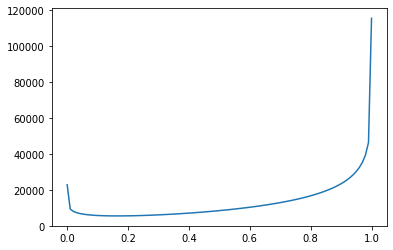

In [34]:
p = np.linspace(1e-5, 1-1e-5, 101)
bp.curve(p, ll_binomial(p,X,K))

## Gamma Random Variable
$$f(x|\alpha, \beta)=(\beta^\alpha\Gamma(\alpha))^{-1}x^{\alpha-1}e^{-\frac{x}{\beta}}$$
$$\alpha > 0, \beta > 0, x > 0$$
### Gamma Function
$\Gamma(\alpha)$ is the generalization of the factorial of all positive non-integers  
If $\alpha$ is an integer, then
$$\Gamma(\alpha) = (\alpha - 1)!$$

Gamma Random Variable models the survivability of objects. It can gage how long an object will survive

For a continuous random variable, every "sum" should be replaced with an integral

### Likelihood Function
$$L(\alpha,\beta|\underline{x})=\prod_{n=1}^{N}f(x_n|\alpha,\beta)$$
Such that $\underline{x}=X_1,\dots,X_N\sim\text{Gamma}(\alpha, \beta)$

Step 0) Take log:
$$\sum\log(f(x_n|\alpha,\beta))$$
$$=\sum\log((\beta^\alpha\Gamma(\alpha))^{-1}x_n^{\alpha-1}e^{-\frac{x}{\beta}})$$
$$=\sum\{\log((\beta^\alpha\Gamma(\alpha)^{-1})+\log(x_n^{\alpha-1})+\log(e^{-\frac{x_n}{\beta}})\}$$
$$=\sum\{-\alpha\log(\beta)-\log(\Gamma(\alpha))+(\alpha-1)\log(x_n)+(-\frac{x_n}{\beta})\}$$

In [35]:
def ll_gamma(theta, x):
    alpha, beta = theta
    Sx = np.sum(x)
    N = x.size
    return N*alpha*np.log(beta)+N*loggamma(alpha)-(alpha-1)*np.sum(np.log(x))+Sx/beta

In [36]:
np.random.seed(6)
N=1001
a=1.24
b=12.43
X = np.random.gamma(a, b, size=N)

In [37]:
minimize(ll_gamma, (1,1), args = (X), method="L-BFGS-B", bounds= [(1e-5, np.inf),(1e-5, np.inf)])

      fun: 3714.803094522761
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00077307, -0.0001819 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 57
      nit: 18
   status: 0
  success: True
        x: array([ 1.2625768, 12.1066433])

# 30 September, 2019

## Differences between discrete and continuous RVs

### Discrete:
$$\sum_S f(x)=1$$

### Continuous:
$$\int_S f(x) =1$$

For a continuous random variable
$$\textbf{E}(g(x)) = \int_S g(x)*f(x)dx$$

**EX**  
Let $X\sim\text{exponential}(\lambda)$
$$f(x|\lambda) = \lambda e^{-\lambda x}$$
$$x > 0, \lambda > 0$$

$$\textbf{E}(x)=\int_0^\infty x*f(x|\lambda)dx$$
$$=\int_0^\infty x * \lambda e^{-\lambda x} dx$$
Integration by parts  
$\lambda\int_0^\infty xe^{-\lambda x}dx$
$uv - \int v du$
$u = x$, $dv = e^{-\lambda x}$  
$du = dx$, $v = -\frac{1}{\lambda} e^{-\lambda x}$
$$\lambda(\frac{-x}{\lambda}e^{-\lambda x} + \frac{1}{\lambda}\int e^{-\lambda x}dx$$
$$=\lambda(\frac{-x}{\lambda}e^{-\lambda x}-\frac{1}{\lambda^2}e^{\lambda x}\big|_0^\infty$$

In [38]:
np.random.seed(16)
N=1001
a=1.24
b=12.43
x=np.random.gamma(a,b,size=N)

In [39]:
theta = minimize(ll_gamma, (1,1), args = (X), method="L-BFGS-B", bounds= [(1e-5, np.inf),(1e-5, np.inf)])

In [40]:
X.mean()

15.285590639370199

In [41]:
theta["x"][0] * theta["x"][1]

15.28556695638821

# 07 October, 2019

$$X\sim\text{Normal}(\mu,\sigma^2)$$
$$\textbf{E}(X)=\mu$$
$$\textbf{V}(X)=\sigma^2$$
Since both the expected value and the variance is such a nice simple aspect, we include them as the parameter.

The aspect of a Normal Random Variable is that the most populus is in the center of the distribution.

Lets define a new RV that's just $X-\mu$  
Let $Y=X-\mu$  
By this, we can say
$$E(Y)=E(X-\mu)$$
$$=E(X)-\mu$$
$$=\mu-\mu$$
$$=0$$

This new RV $Y$ just takes the previous RV $X$ and shifts to center at $0$

Let $Y=\frac{X-\mu}{\sigma}$
$$E(Y)=E(\frac{X-\mu}{\sigma})$$
$$=\frac{1}{\sigma}E(X-\mu)$$
$$=0$$

Let $Y=\frac{X-\mu}{\sigma}$
$$V(Y) = V(\frac{X-\mu}{\sigma})$$
$$=\frac{1}{\sigma^2}V(X-\mu)$$
$$=\frac{1}{\sigma^2}V(X)$$
$$=1$$

This allows a normal RV to be shifted so the center is at zero and the scale is at one

$$\frac{1}{N}\sum x_n$$
If we do a function on a Random Variable, what comes out is a Random Variable. Therefore we can find the expected value of it
$$E(\frac{1}{N}\sum x_n)$$
"The population mean of sample means"
$$\frac{1}{N}E(\sum x_n)$$
$$=\frac{1}{N}\sum(E(x_n))$$
$$=\frac{1}{N}*N*\mu$$
$$=\mu$$


Let $X_1,\dots,X_N\sim F$  
if $E(X)=\mu$, $V(X)=\sigma^2 < \infty$,  
$$\frac{\hat{\mu}-\mu}{\frac{\sigma}{\sqrt{N}}}\sim N(0,1)$$

If all of our data is independent
$$V(\frac{1}{N}\sum_{n=1}^{N}x_n)$$
$$=\frac{1}{N^2}V(\sum x_n)$$
Because independence
$$=\frac{1}{N^2}\sum V(x_n)$$
$$=\frac{\sigma^2}{N}$$

This is how we justify and quantify uncertainty

# 09 October, 2019

$$X_1,\dots,X_N\sim_{iid}F$$
Where $iid$ means:
  1. $i$ - independent
  2. $id$ - Identically distributed -- all data from same population "If you're looking at humans, an elephand doesn't get in there"

## Central Limit Theorem
If $E(X)=\mu$ and $V(X)=\sigma^2 < \infty$, then $\frac{\hat{\mu}-\mu}{\frac{\sigma}{\sqrt{N}}}\sim_. N(0,1)$

Meaning that there is a normal curve centered at 0 with an average squared distance of 1

In [42]:
R = 1001
N = 30
p = 0.64
muhats = np.full(R, np.nan)
for r in range(R):
    muhats[r] = np.random.binomial(1, p, N).mean()

In [43]:
z = (muhats - p) / (np.sqrt(((p*(1-p))/30)))


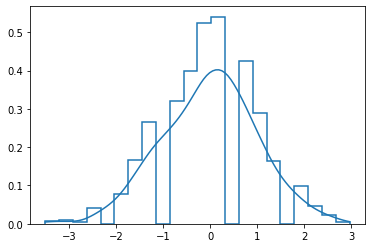

In [44]:
bp.density(z)
bp.histogram(z)

# 10 October, 2019

Issues with Central Limit Theorem

If $\hat{\mu}$ is our best guess -- why do we have $\mu$  
How do we get around the dependence on population parameters

How do we deal with a single data set?

**Dealing with Dependence on Parameters**  
The most important aspect of the Central Limit Theorem is the standard deviation of the sample mean (The denomenator $\frac{\sigma}{\sqrt{N}}$)

In [45]:
R = 1001
muhats = np.full(R, np.nan)
for r in range(R):
    muhats[r] = np.median(np.random.normal(np.pi, 2, 10))

In [46]:
muhats

array([3.12333154, 3.32658109, 3.42856965, ..., 2.59372924, 2.60734789,
       2.42904414])

In [47]:
print(muhats.mean())
print(muhats.std())

3.123693090123138
0.7369192690558536


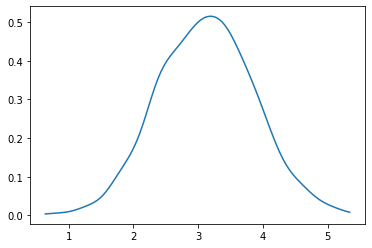

In [48]:
bp.density(muhats)
#bp.density(muhats2, color="orange")

# 14 October, 2019

Let $X\sim\text{Normal}(\mu,\sigma^2)$  
$E(X)=\mu$  
We can estimate the population mean by taking a bunch of samples and dividing how many there are

Let $\hat{\mu}=\frac{1}{N}\sum_{n=1}^{N}X_n$  
$E(\hat{\mu})$  
for $\hat{\mu}_1,\dots,\hat{\mu}_R\sim^.N(\mu,\frac{\sigma^2}{N})$

Let $T(\underline{x})$  
$E(\hat{T})$  
$\hat{T}_1,\dots,\hat{T}_R\sim ?$  
We don't know what $T$ is, but we don't care. We know that the population parameter will be centered at $T$ and it's variance will be over $N$ samples

In [52]:
Y = np.asarray([1,2,3,4,6])
np.random.choice(Y, replace=True, size=5)

array([4, 1, 3, 2, 2])

Re sampling from our original samples is just a good of guess as any, and allows us to find standard deviations and uncertainty

In [50]:
X = np.random.normal(np.pi, 2, 1001)
N = X.size
R = 1001
muhats = np.full(R, np.nan)
for i in range(R):
    muhats[r] = np.std(np.random.choice(X, replace=True, size=N))

The formal name for the shape that a summary statistic takes on (when you think of it as a Random Variable) is the **sampling distribution**.  
All summary statistics have sampling distributions. The central limit theorem tells us the sampling distribution of the sample mean is approximately normal.  
Summary statistics are to be thought of as random variables, meaning they have sampling distributions under repeated sampling